https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc

### Create a function to pull the previous 100 games in League

In [1]:
api_key = "RGAPI-685adb47-1a82-44f7-89e2-71b5dae3a2a7"

In [2]:
def getPast100Games(api_key,summonerName,numGames=30):
    import pandas as pd
    import requests 

    if ' ' in summonerName:
        summonerPullName= summonerName.replace(' ','%20')
    else:
        summonerPullName=summonerName
    print(summonerPullName)
    
    api_key = api_key
    api_url = f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{summonerPullName}"
    api_url = api_url + '?api_key=' + api_key

    resp = requests.get(api_url)
    player_info = resp.json()
    puuid=player_info['puuid']

    api_url=f'https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count={numGames}'
    api_url = api_url + '&api_key=' + api_key 
    resp = requests.get(api_url)
    match_ids = resp.json()
    
    df=pd.DataFrame([])
    for match in match_ids:
        try:
            # print(f'Pulling {match}')
            match_id=f'https://americas.api.riotgames.com/lol/match/v5/matches/{match}'
            api_url = match_id + '?api_key=' + api_key 
            resp = requests.get(api_url)
            # print(resp)
            
            rspn_txt=resp.json()['info']['participants']

            df1=pd.DataFrame(rspn_txt)
            # print(df1.head(1))
            # print(df1[['summonerName']])
            # print(summonerName)
            
            df1=df1.loc[df1['summonerName']==summonerName]
            # print(df1)
            df1=df1[['kills'
            ,'deaths'
            ,'assists'
            ,'magicDamageDealt'
            ,'physicalDamageDealt'
            # ,'challenges'
            # ,'damageTakenOnTeamPercentage'
            # ,'killParticipation'
            ,'damageDealtToObjectives'
            ,'firstBloodKill'
            ,'goldEarned'
            ,'champExperience'
            ,'timePlayed'
            ,'gameEndedInEarlySurrender'
            ,'summonerName'
            ,'win'
            ]]
            df=pd.concat([df,df1],ignore_index=True)
            
            # print('\tComplete')

        except Exception as e:
            print(f'\tFAIL {match}')
            print(e)
    return (df,player_info)

In [3]:
import time
time.sleep(120)

print(f'pulling Jason')
jason_df,player_info=getPast100Games(api_key,"DDuck Hat",100)

time.sleep(120)

print(f'pulling Jeff')
jeff_df,player_info=getPast100Games(api_key,"Triemer",100)

time.sleep(120)

print(f'pulling Jared')
jared_df,player_info=getPast100Games(api_key,"Knuckle Touch",100)


pulling Jason
DDuck%20Hat
	FAIL NA1_4924325605
'info'
pulling Jeff
Triemer
	FAIL NA1_4924004097
'info'
pulling Jared
Knuckle%20Touch
	FAIL NA1_4937068315
'info'


In [4]:
print(jason_df.shape)
print(jared_df.shape)
print(jeff_df.shape)

(99, 13)
(99, 13)
(99, 13)


In [5]:
import pandas as pd
df=pd.concat([jeff_df,jason_df,jared_df],ignore_index=True)
print(df.shape)

(297, 13)


In [6]:
df.summonerName.unique()

array(['Triemer', 'DDuck Hat', 'Knuckle Touch'], dtype=object)

In [7]:
df.head()

,kills,deaths,assists,magicDamageDealt,physicalDamageDealt,damageDealtToObjectives,firstBloodKill,goldEarned,champExperience,timePlayed,gameEndedInEarlySurrender,summonerName,win
0,14,5,22,19487,128627,2640,False,16077,19532,1122,False,Triemer,True
1,7,12,30,31389,35673,128,False,17211,29790,1714,False,Triemer,False
2,12,11,33,2186,74431,626,False,15126,24573,1315,False,Triemer,False
3,8,8,16,752,39231,1458,False,10529,11717,871,False,Triemer,True
4,5,7,28,57569,2100,411,False,10213,14301,894,False,Triemer,True


In [8]:
df['win'] = df['win']*1
df['firstBloodKill'] = df['firstBloodKill']*1
df['gameEndedInEarlySurrender'] = df['gameEndedInEarlySurrender']*1
df['damage']=df['physicalDamageDealt']+df['magicDamageDealt']
df['kda']=(df['kills']+df['assists'])/(df['deaths']+1) # adding 1 death, so that any deathless games dont break the math later on...



In [9]:
df.head()

,kills,deaths,assists,magicDamageDealt,physicalDamageDealt,damageDealtToObjectives,firstBloodKill,goldEarned,champExperience,timePlayed,gameEndedInEarlySurrender,summonerName,win,damage,kda
0,14,5,22,19487,128627,2640,0,16077,19532,1122,0,Triemer,1,148114,6.000000
1,7,12,30,31389,35673,128,0,17211,29790,1714,0,Triemer,0,67062,2.846154
2,12,11,33,2186,74431,626,0,15126,24573,1315,0,Triemer,0,76617,3.750000
3,8,8,16,752,39231,1458,0,10529,11717,871,0,Triemer,1,39983,2.666667
4,5,7,28,57569,2100,411,0,10213,14301,894,0,Triemer,1,59669,4.125000


In [10]:
df=df.loc[df['gameEndedInEarlySurrender']==False]
df=df[[
'kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
'summonerName',
'win',
'damage',
'kda'
]]

In [11]:
df['Jeff']=df.summonerName.replace(to_replace=['DDuck Hat','Knuckle Touch', 'Triemer'], value=[0,0, 1])
df['Jason']=df.summonerName.replace(to_replace=['DDuck Hat','Knuckle Touch', 'Triemer'], value=[1,0, 0])
df['Jared']=df.summonerName.replace(to_replace=['DDuck Hat','Knuckle Touch', 'Triemer'], value=[0,1, 0])

C:\Users\Jeff\AppData\Local\Temp\ipykernel_15632\2038178340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Jeff']=df.summonerName.replace(to_replace=['DDuck Hat','Knuckle Touch', 'Triemer'], value=[0,0, 1])
C:\Users\Jeff\AppData\Local\Temp\ipykernel_15632\2038178340.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Jason']=df.summonerName.replace(to_replace=['DDuck Hat','Knuckle Touch', 'Triemer'], value=[1,0, 0])
C:\Users\Jeff\AppData\Local\Temp\ipykernel_15632\2038178340.py:3: FutureWarning: Downcasting behavior i

### Modelling

Now that we have some data, we can start to cook something up. Is there anyway Game 1 can predict game 2?

I can compare my data vs Jason's?
- Maybe I can show some anova modeling or logistic reg.

In [12]:
from scipy.stats import f_oneway
import researchpy as rp

In [13]:
g=rp.summary_cont(df['win'].groupby(df['summonerName']))
g=g.reset_index()
g

,summonerName,N,Mean,SD,SE,95% Conf.,Interval
0,DDuck Hat,99,0.5051,0.5025,0.0505,0.4048,0.6053
1,Knuckle Touch,98,0.5102,0.5025,0.0508,0.4095,0.6109
2,Triemer,98,0.4490,0.4999,0.0505,0.3487,0.5492


In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.f_oneway(df['win'][df['summonerName'] == 'Triemer'],
               df['win'][df['summonerName'] == 'DDuck Hat'],
               df['win'][df['summonerName'] == 'Knuckle Touch'])

F_onewayResult(statistic=0.44964199478699757, pvalue=0.6382973598498056)

In [15]:
g = df.groupby('summonerName')['win'].mean()
g

summonerName
DDuck Hat        0.505051
Knuckle Touch    0.510204
Triemer          0.448980
Name: win, dtype: float64

In [16]:
import matplotlib.pyplot as plt
def plotthis(this):
        fig = plt.figure(figsize= (5, 5))
        ax = fig.add_subplot(111)

        ax.set_title(f"Box Plot of {this} by Player", fontsize= 20)
        ax.set
        data = [df[this][df['summonerName'] == 'Triemer'],
                df[this][df['summonerName'] == 'DDuck Hat'],
                df[this][df['summonerName'] == 'Knuckle Touch']]

        ax.boxplot(data,
                labels= ['Triemer', 'DDuck Hat','Knuckle Touch'],
                showmeans= True)

        plt.xlabel("Player")
        plt.ylabel(this)
        
        g = df.groupby('summonerName')[this].mean()
        print(g)

        plt.show()

kills
summonerName
DDuck Hat         9.666667
Knuckle Touch    10.255102
Triemer           8.765306
Name: kills, dtype: float64


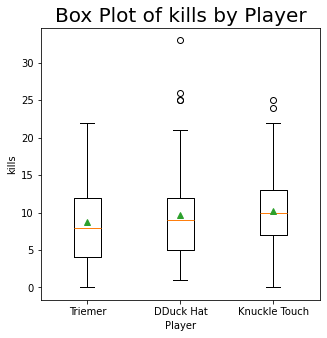

deaths
summonerName
DDuck Hat        8.424242
Knuckle Touch    8.622449
Triemer          9.173469
Name: deaths, dtype: float64


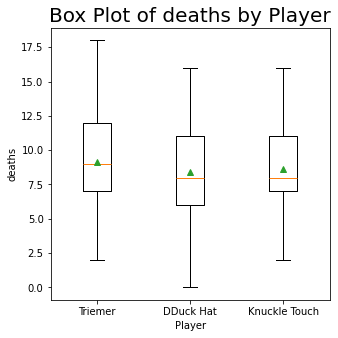

assists
summonerName
DDuck Hat        18.353535
Knuckle Touch    26.530612
Triemer          22.816327
Name: assists, dtype: float64


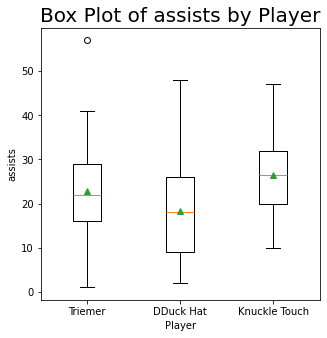

magicDamageDealt
summonerName
DDuck Hat        23665.878788
Knuckle Touch    35083.244898
Triemer          24723.530612
Name: magicDamageDealt, dtype: float64


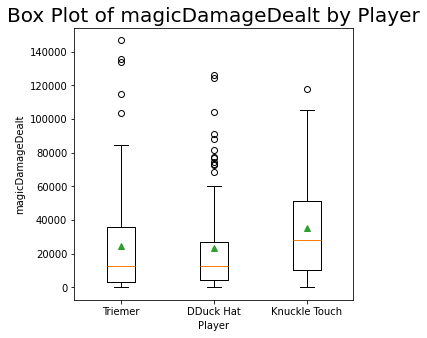

physicalDamageDealt
summonerName
DDuck Hat        42375.777778
Knuckle Touch    18581.224490
Triemer          33311.510204
Name: physicalDamageDealt, dtype: float64


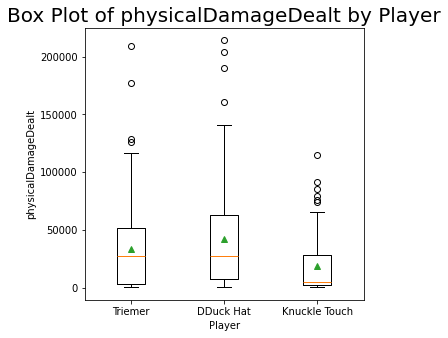

damageDealtToObjectives
summonerName
DDuck Hat        4085.949495
Knuckle Touch    1309.836735
Triemer          1901.132653
Name: damageDealtToObjectives, dtype: float64


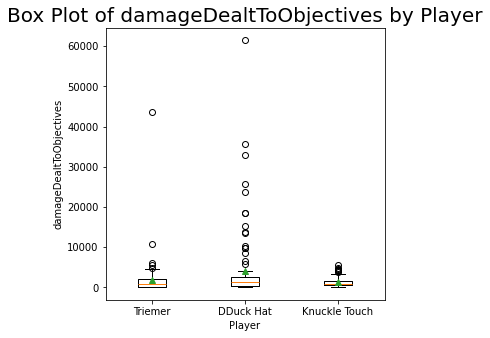

firstBloodKill
summonerName
DDuck Hat        0.101010
Knuckle Touch    0.122449
Triemer          0.081633
Name: firstBloodKill, dtype: float64


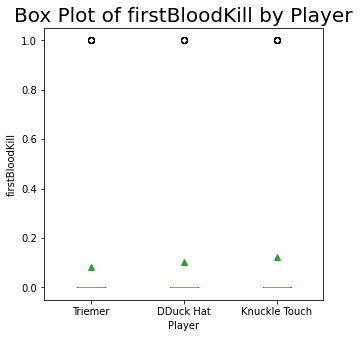

goldEarned
summonerName
DDuck Hat        13030.333333
Knuckle Touch    13324.142857
Triemer          12811.224490
Name: goldEarned, dtype: float64


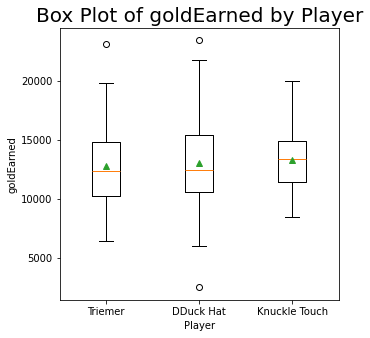

champExperience
summonerName
DDuck Hat        17762.464646
Knuckle Touch    18792.622449
Triemer          17344.285714
Name: champExperience, dtype: float64


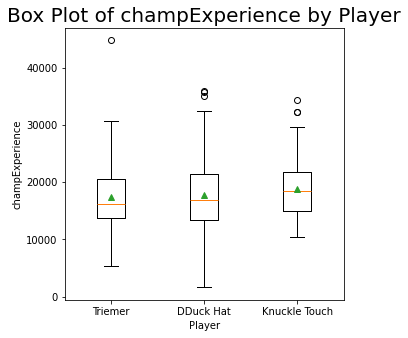

timePlayed
summonerName
DDuck Hat        1087.868687
Knuckle Touch    1122.142857
Triemer          1097.397959
Name: timePlayed, dtype: float64


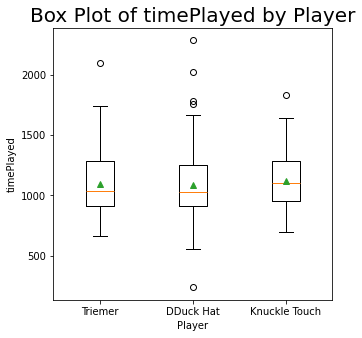

win
summonerName
DDuck Hat        0.505051
Knuckle Touch    0.510204
Triemer          0.448980
Name: win, dtype: float64


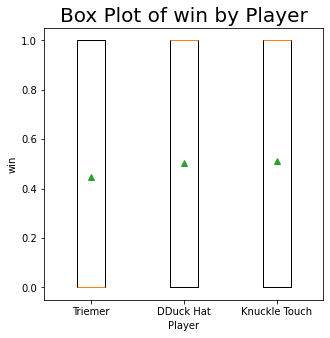

damage
summonerName
DDuck Hat        66041.656566
Knuckle Touch    53664.469388
Triemer          58035.040816
Name: damage, dtype: float64


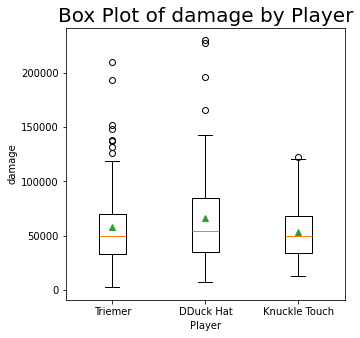

kda
summonerName
DDuck Hat        3.227038
Knuckle Touch    4.267899
Triemer          3.357143
Name: kda, dtype: float64


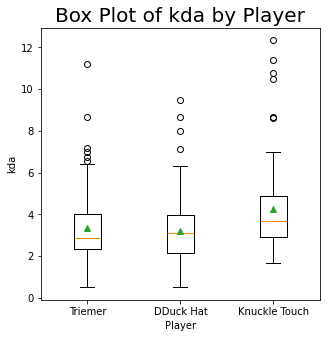

Jeff
summonerName
DDuck Hat        0.0
Knuckle Touch    0.0
Triemer          1.0
Name: Jeff, dtype: float64


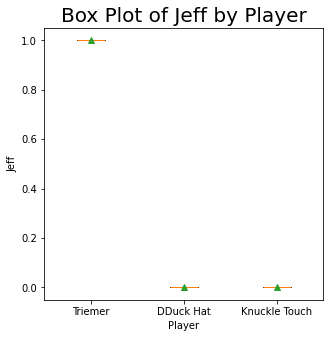

Jason
summonerName
DDuck Hat        1.0
Knuckle Touch    0.0
Triemer          0.0
Name: Jason, dtype: float64


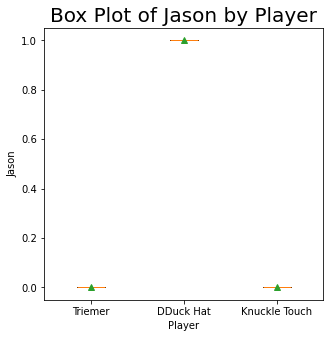

Jared
summonerName
DDuck Hat        0.0
Knuckle Touch    1.0
Triemer          0.0
Name: Jared, dtype: float64


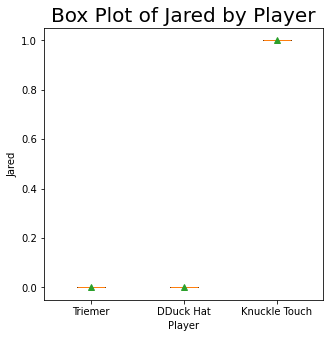

In [61]:
for each in df.columns.tolist():
    if each != 'summonerName':
        print(each)
        plotthis(each)

### Now lets try some MLR!
- Can we predict a game result using the data we have here? To what accuracy?

In [18]:
import numpy as np

In [19]:
train_df = df.sample(frac = 0.8)

test_df = df.drop(train_df.index)

In [20]:
df

,kills,deaths,assists,magicDamageDealt,physicalDamageDealt,damageDealtToObjectives,firstBloodKill,goldEarned,champExperience,timePlayed,summonerName,win,damage,kda,Jeff,Jason,Jared
0,14,5,22,19487,128627,2640,0,16077,19532,1122,Triemer,1,148114,6.000000,1,0,0
1,7,12,30,31389,35673,128,0,17211,29790,1714,Triemer,0,67062,2.846154,1,0,0
2,12,11,33,2186,74431,626,0,15126,24573,1315,Triemer,0,76617,3.750000,1,0,0
3,8,8,16,752,39231,1458,0,10529,11717,871,Triemer,1,39983,2.666667,1,0,0
4,5,7,28,57569,2100,411,0,10213,14301,894,Triemer,1,59669,4.125000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,10,8,14,68363,12317,703,0,16099,25151,1504,Knuckle Touch,1,80680,2.666667,0,0,1
293,7,7,27,36052,882,0,0,10766,15890,952,Knuckle Touch,0,36934,4.250000,0,0,1
294,10,7,19,49766,801,0,0,13203,18573,1147,Knuckle Touch,0,50567,3.625000,0,0,1
295,24,13,30,7163,65520,1318,0,18653,25496,1465,Knuckle Touch,1,72683,3.857143,0,0,1


In [21]:
X_train=(train_df[['kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
# 'summonerName',
'Jeff',
'Jason',
'Jared',
'damage',
'kda']])
y_train=(train_df[['win']])

x_test=np.array(test_df[['kills',
'deaths',
'assists',
'magicDamageDealt',
'physicalDamageDealt',
'damageDealtToObjectives',
'firstBloodKill',
'goldEarned',
'champExperience',
'timePlayed',
# 'summonerName',
'Jeff',
'Jason',
'Jared',
'damage',
'kda']])
y_test=np.array(test_df[['win']])

C:\Users\Jeff\AppData\Local\Temp\ipykernel_15632\2331414520.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train.iloc[:,14],y_train,cmap='rainbow')


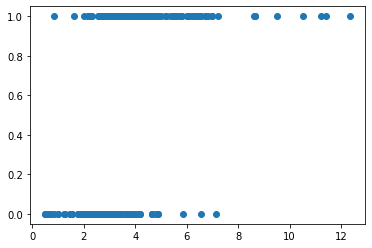

In [22]:
plt.scatter(X_train.iloc[:,14],y_train,cmap='rainbow')
plt.show()

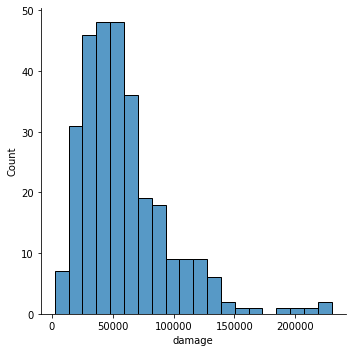

In [24]:
# penguins = sns.load_dataset("penguins")
import seaborn as sns
sns.displot(data=df['damage'])

In [25]:
import statsmodels.api as sm

results = sm.GLM(y_train,X_train).fit()
results.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    win   No. Observations:                  236
Model:                            GLM   Df Residuals:                      222
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                         0.17143
Method:                          IRLS   Log-Likelihood:                -119.55
Date:                Sat, 30 Mar 2024   Deviance:                       38.058
Time:                        14:50:09   Pearson chi2:                     38.1
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
kills                      -0.0008      0.012     -0.069      0.945      -0.024       0.022
deaths                     -0.0622      0.018     -3.492      0.000      -0.097      -0.027
assists                     0.0065      0.005      1.208      0.227      -0.004       0.017
magicDamageDealt        -1.962e-06   7.59e-07     -2.583      0.010   -3.45e-06   -4.73e-07
physicalDamageDealt     -6.138e-07   6.96e-07     -0.882      0.378   -1.98e-06     7.5e-07
damageDealtToObjectives  9.146e-06   6.19e-06      1.477      0.140   -2.99e-06    2.13e-05
firstBloodKill             -0.0147      0.094     -0.156      0.876      -0.199       0.170
goldEarned               4.618e-05    4.1e-05      1.127      0.260   -3.41e-05       0.000
champExperience          2.825e-05    1.7e-05      1.666      0.096   -4.98e-06    6.15e-05
timePlayed                 -0.0005      0.000     -2.664      0.008      -0.001      -0.000
Jeff                        0.4286      0.244      1.753      0.080      -0.051       0.908
Jason                       0.3757      0.236      1.592      0.111      -0.087       0.838
Jared                       0.3286      0.246      1.335      0.182      -0.154       0.811
damage                  -2.575e-06   9.96e-07     -2.585      0.010   -4.53e-06   -6.23e-07
kda                         0.0425      0.035      1.215      0.225      -0.026       0.111
===========================================================================================
"""

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7457627118644068
Confusion Matrix : 
[[27  6]
 [ 9 17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.74      0.65      0.69        26

    accuracy                           0.75        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.75      0.75      0.74        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeff\AppData\Local\Pa

In [60]:
pd.DataFrame(np.around(np.exp(lr.coef_.tolist()[0])-1,4),X_train.columns.tolist())

,0
kills,-0.0138
deaths,-0.0483
assists,0.0886
magicDamageDealt,-0.0000
physicalDamageDealt,-0.0000
damageDealtToObjectives,0.0001
firstBloodKill,0.0005
goldEarned,0.0003
champExperience,0.0002
timePlayed,-0.0069


In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(x_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
conf = confusion_matrix(y_test, y_pred_svm)
clf_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy Score of SVM is : {acc_svm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of SVM is : 0.7288135593220338
Confusion Matrix : 
[[24  9]
 [ 7 19]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.68      0.73      0.70        26

    accuracy                           0.73        59
   macro avg       0.73      0.73      0.73        59
weighted avg       0.73      0.73      0.73        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.4745762711864407
Confusion Matrix : 
[[16 17]
 [14 12]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.48      0.51        33
           1       0.41      0.46      0.44        26

    accuracy                           0.47        59
   macro avg       0.47      0.47      0.47        59
weighted avg       0.48      0.47      0.48        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7966101694915254
Confusion Matrix : 
[[28  5]
 [ 7 19]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.79      0.73      0.76        26

    accuracy                           0.80        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.80      0.80      0.80        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [68]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy Score of Random Forest is : 0.7966101694915254
Confusion Matrix : 
[[29  4]
 [ 8 18]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.82      0.69      0.75        26

    accuracy                           0.80        59
   macro avg       0.80      0.79      0.79        59
weighted avg       0.80      0.80      0.79        59



### what is ADA?
- removed base_estimator = dtc from boost classifier

In [70]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(x_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8305084745762712
Confusion Matrix : 
[[29  4]
 [ 6 20]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.83      0.77      0.80        26

    accuracy                           0.83        59
   macro avg       0.83      0.82      0.83        59
weighted avg       0.83      0.83      0.83        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


### Gradient boosting classifier?
Great performance, what is this model?

In [71]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of GradientBoostingClassifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.847457627118644
Confusion Matrix : 
[[31  2]
 [ 7 19]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.90      0.73      0.81        26

    accuracy                           0.85        59
   macro avg       0.86      0.84      0.84        59
weighted avg       0.85      0.85      0.84        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


### XgBoost Classifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

### Cat boost

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(x_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

### Extra Trees Classifier

In [72]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(x_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7796610169491526
Confusion Matrix : 
[[27  6]
 [ 7 19]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.76      0.73      0.75        26

    accuracy                           0.78        59
   macro avg       0.78      0.77      0.78        59
weighted avg       0.78      0.78      0.78        59



C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


### LGBM Classifier

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

## Model Eval

In [78]:
# models = pd.DataFrame({
#     'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
#              'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
#                , 'ANN'],
#     'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, ]
# })

# models.sort_values(by = 'Score', ascending = False)

NameError: name 'acc_xgb' is not defined